# Modern Teen Mental Health Dataset- EDA

#### Master's Semester Project: 
Dataset: modern_teen_mental_health_main.csv (from Kaggle's Inside Teen Minds).This dataset contains 1,000 students tracked over 30 days, capturing mood, stress, sleep, and screen time habits, etc.

Tasks: Data Loading, Dataset Overview and Statistics, Target Definition and Balance, Missing Value Analysis, Univariate Analysis, Bivariate Ananlysis, Corelation Ananlysis

+Note: In every code cell, Code comments and Key-insights are added for learning purposes.
Github: https://github.com/leena31/DS-Teen-Mental-Health-Dataset

## Data Loading

In [17]:
# ============================================
# 1. SETUP: Import libraries and configure paths
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
# Set plotting style for consistency and readability
sns.set(style="whitegrid", palette="Set2")

#CSV is loaded from directory path - ../data/raw 
DATA_PATH = "../data/raw/modern_teen_mental_health_main.csv"
# ============================================
# 2. LOAD DATA: Read the main CSV into a DataFrame
# ============================================
df = pd.read_csv(DATA_PATH)
print("DATASET SHAPE (rows, columns):", df.shape)
# Show the first 5 rows to preview the structure
display(df.head())

# -----------------------------------------------------------------------------      
# ~ Key Insights about the Dataset ~: 
# - The dataset contains ~30,000 rows and 17 columns.
# -----------------------------------------------------------------------------      

DATASET SHAPE (rows, columns): (30000, 17)


,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9


## Dataset Overview and Statistics

In [18]:
# ============================================
# 3. DATA STRUCTURE: Data Types and Summary
# ============================================
# Summary of the DataFrame
display("SUMMARY OF THE DATASET:")
df.info()
display("-----------------------------------------------------------------------------")
# ============================================
# 4. DESCRIPTIVE STATISTICS: Numerical features
# ============================================
# Column categories for better understanding of the dataset
col_categories = {
    'demographics': ['age', 'gender', 'country'],
    'habits_lifestyle': [
        'sleep_hours', 'screen_time_hours', 'used_ai_today', 
        'ai_tool', 'journaled_today', 'meditated_today', 'exercised_today'
    ],
    'academic': ['grade'],
    'social_emotional': [
        'mood', 'stress_level', 'social_interaction_rating', 'support_feeling'
    ]
}
print("UNDERSTANDING FEATURE CATEGORIES:\n")
habits_lifestyle_desc = df[col_categories['habits_lifestyle']].describe().T
print("HABITS AND LIFESTYLE FEATURES DESCRIPTIVE STATISTICS:")
print(habits_lifestyle_desc)
social_emotional_desc = df[col_categories['social_emotional']].describe().T
print("\nSOCIAL AND EMOTIONAL FEATURES DESCRIPTIVE STATISTICS:")
print(social_emotional_desc)
academic_desc = df[col_categories['academic']].describe().T
print("\nACADEMIC FEATURES DESCRIPTIVE STATISTICS:")
print(academic_desc)
demographics_desc = df[col_categories['demographics']].describe().T
print("\nDEMOGRAPHICS FEATURES DESCRIPTIVE STATISTICS:")
print(demographics_desc)
print("-----------------------------------------------------------------------------")
# ============================================
# UNIQUE VALUES PER COLUMN
# ============================================
print('UNIQUE VALUES FOR COLUMN:')
for col in df.columns:
    print(col, ":", "Unique valcount:",df[col].nunique(), "Unique values:", df[col].unique()[:5])
    print("------")
print("-----------------------------------------------------------------------------")
# -------------------------------------------------------------
# ~ Key Insights about the descriptive statistics ~:
# - Descriptive statistics provide insights into central tendencies and summarized using 
# count, mean, std, min, 25%, 50%, 75%, and max.
# - Features are manually grouped into four distinct categories as  lifestyle habits, mental health, academic and demographics 
# to better analyze the relationship. 
# - This will help identify potential outliers and data distribution.
# -------------------------------------------------------------

'SUMMARY OF THE DATASET:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditated_today            30000 non-null  boo

'-----------------------------------------------------------------------------'

UNDERSTANDING FEATURE CATEGORIES:

HABITS AND LIFESTYLE FEATURES DESCRIPTIVE STATISTICS:
                     count      mean       std  min  25%  50%  75%   max
sleep_hours        30000.0  6.487783  1.493795  0.2  5.5  6.5  7.5  12.3
screen_time_hours  30000.0  6.980977  1.993324 -0.8  5.6  7.0  8.3  15.6

SOCIAL AND EMOTIONAL FEATURES DESCRIPTIVE STATISTICS:
                             count      mean       std  min  25%  50%  75%  \
mood                       30000.0  6.000733  1.991866  3.0  4.0  6.0  8.0   
stress_level               30000.0  4.043867  2.069449  1.0  2.0  4.0  6.0   
social_interaction_rating  30000.0  6.013700  1.997860  3.0  4.0  6.0  8.0   
support_feeling            30000.0  6.500267  1.713271  4.0  5.0  6.0  8.0   

                           max  
mood                       9.0  
stress_level               8.0  
social_interaction_rating  9.0  
support_feeling            9.0  

ACADEMIC FEATURES DESCRIPTIVE STATISTICS:
       count unique  top  freq
grade  

## Missing Value Ananlysis

In [19]:
# ============================================
# 5. MISSING VALUES: absolute and percent
# ============================================
# Checking missing percent for every column
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_table = pd.concat([missing, missing_pct], axis=1, keys=['missing_count', 'missing_percentage']) 
missing_table = missing_table[missing_table['missing_count'] > 0].sort_values(by='missing_count', ascending=False)
if missing_table['missing_count'].sum() > 0:
    print("MISSING:", missing_table)
#------------------------------------------------------------- 
# ~ Key Insights about the Dataset ~: 
# - Column 'ai_tool' has high missingness.
#------------------------------------------------------------- 

MISSING:          missing_count  missing_percentage
ai_tool          12009               40.03


## Target definition & Overview  
The target variable in this study is adolescent stress level. Since the original dataset provides stress as a numerical score, it is transformed into three ordinal categories — Low, Medium, and High — to formulate a multi-class classification problem.

Target(Stress Category) Distribution:
target
Medium    43.193333
Low       28.520000
High      28.286667
Name: proportion, dtype: float64


/var/folders/h8/45lqwfxx7yjfd97nv0scjsb80000gn/T/ipykernel_1441/3597575891.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, order=['Low', 'Medium', 'High'], palette="Set2")


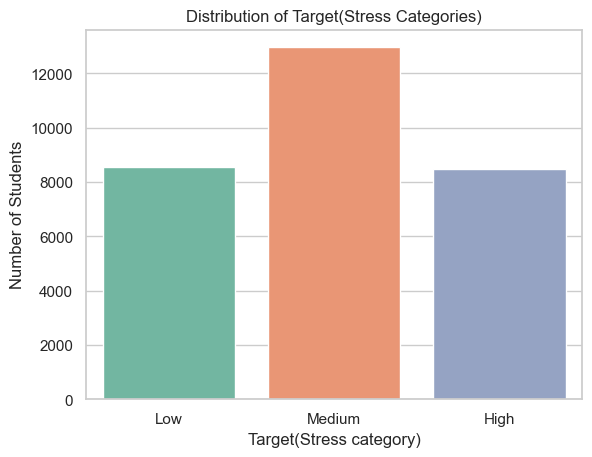

In [20]:
# ============================================
# 6. TARGET: definition and balance
# ============================================
#Binning logic
def categorize_stress(val):
    if val <= 2: return 0   # Low
    elif val <= 5: return 1 # Medium
    else: return 2          # High

df['target'] = df['stress_level'].apply(categorize_stress)
df['target'] = df['target'].map({0: 'Low', 1: 'Medium', 2: 'High'})
# Check categorized distribution
print("Target(Stress Category) Distribution:")
print(df['target'].value_counts(normalize=True) * 100) # In Percentage
# Distribution of stress categories(Low, Medium, High) among total number of students
sns.countplot(x='target', data=df, order=['Low', 'Medium', 'High'], palette="Set2")
plt.xlabel("Target(Stress category)")
plt.ylabel("Number of Students")
plt.title("Distribution of Target(Stress Categories)")
plt.show()
#------------------------------------------------------------- 
# ~ Key Insights about target ~: 
# - Problem Type: This is going to be a Multi-class Classification problem, 
# transforming stress ratings into three categories: Low, Medium, and High.
# - Class Distribution: +Medium: 43.19% +Low: 28.52% +High: 28.29%
# - Binning Logic (Stress levels 1(min)-8(max)):Low (1-2):Medium (3-5) High (6-8)
# - Justification: While a severity-focused split (e.g., 1-3,4-6,7-8(High)) offers higher clinical specificity, 
# it creates a significant class imbalance (13.8% vs approx 43%). 
# I chose Balanced Binning (6-8 as High) to ensure the dataset is robust for modeling. 
# This prevents the classifier from becoming biased toward the majority classes and simplifies 
# the evaluation phase by providing a reliable baseline for accuracy and F1-scores.
#------------------------------------------------------------- 

## Univariate Analysis

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


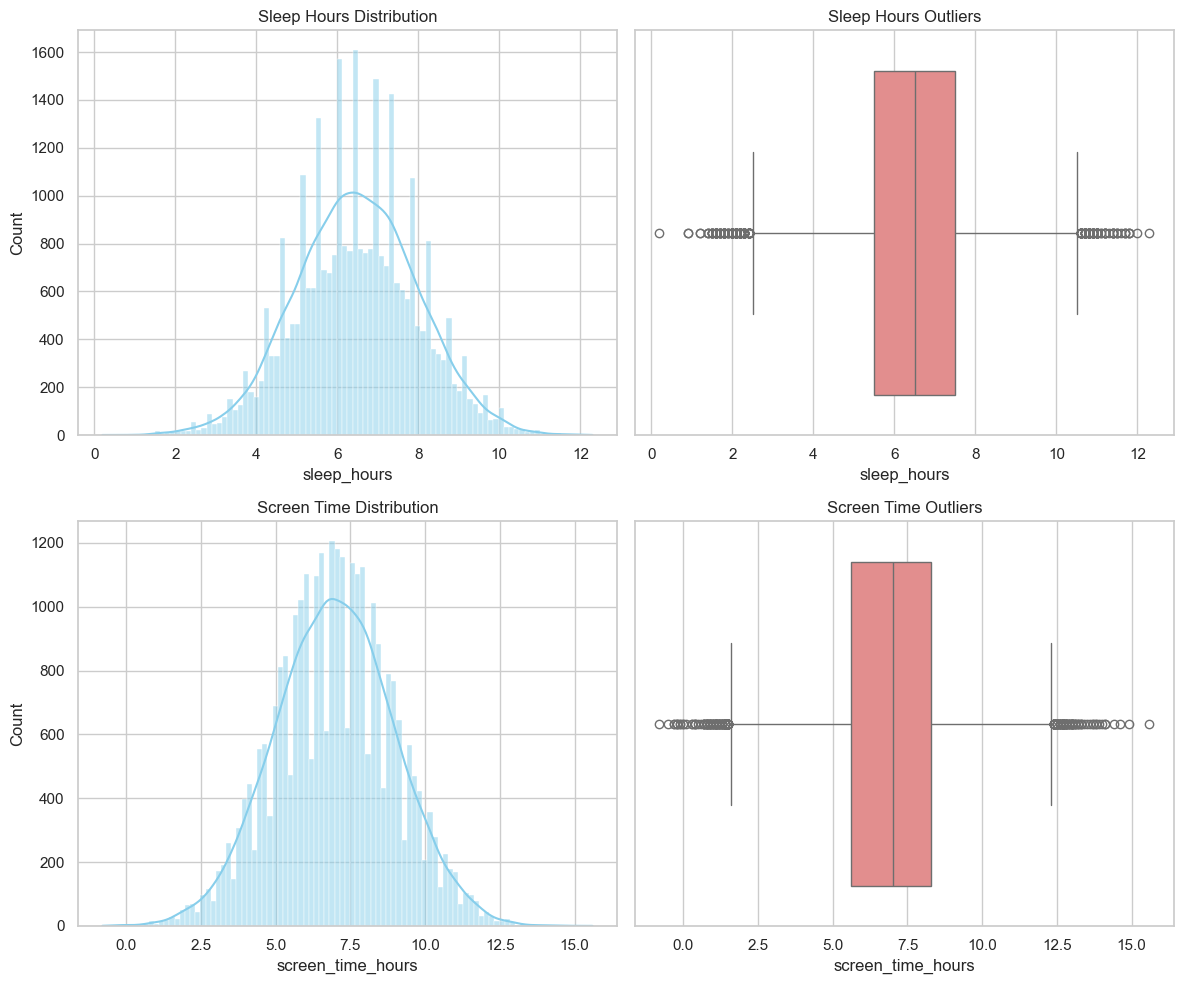

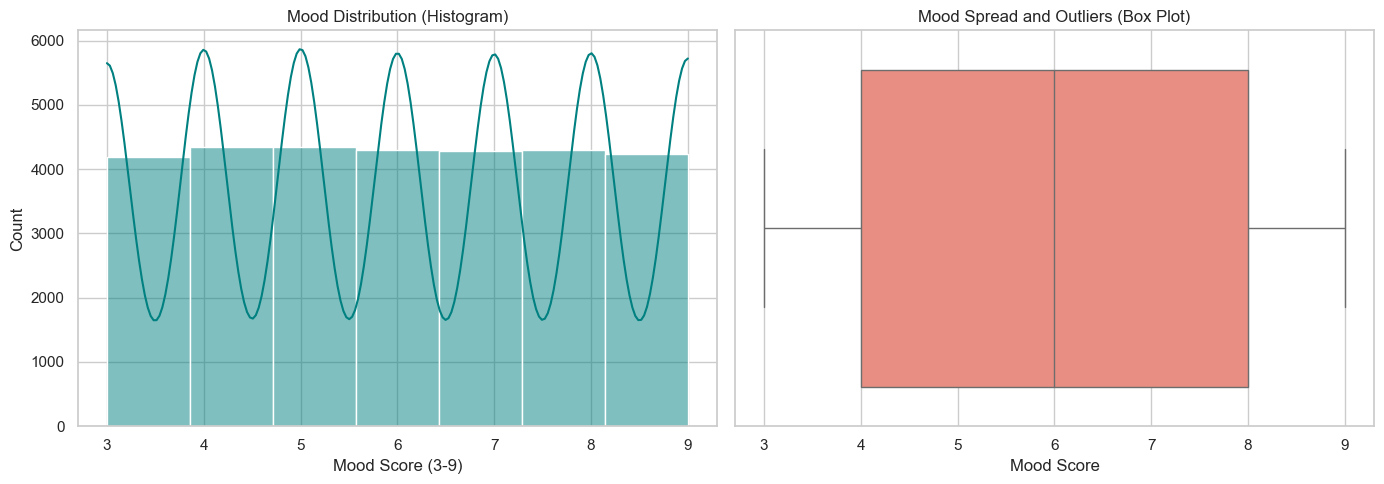

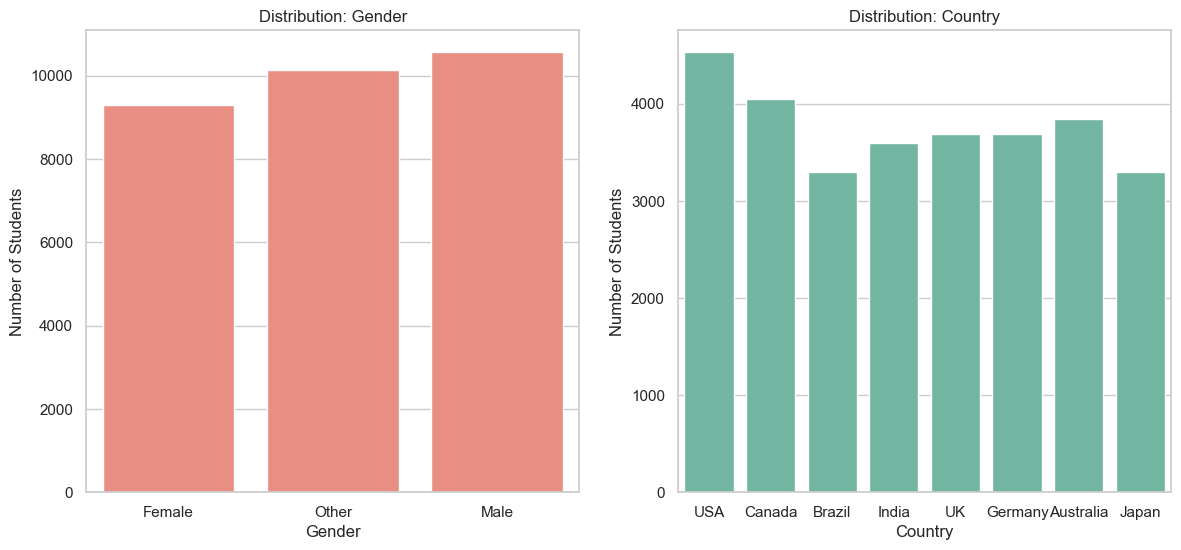

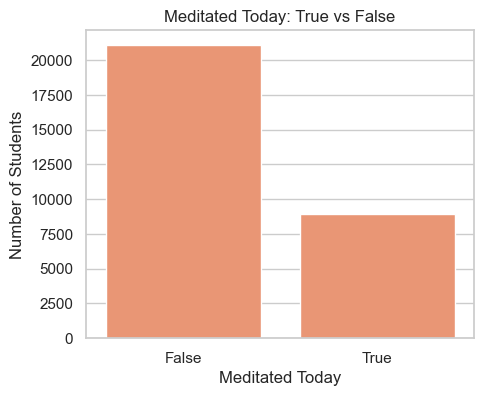

In [21]:
#===========================================
# 7. VISUALIZATIONS: EDA plots for key features
# ============================================
# Visualizations for key features to understand distributions and relationships
# 1. Numerical Features: Sleep Hours and Screen Time with Histograms and Boxplots to check distribution and outliers
# Set up a 2x2 grid(side by side view of histo and boxplots)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# --- ROW 1: SLEEP HOURS ---
# Histogram
sns.histplot(df['sleep_hours'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Sleep Hours Distribution')
# Boxplot
sns.boxplot(x=df['sleep_hours'], color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Sleep Hours Outliers')

# --- ROW 2: SCREEN TIME ---
# Histogram
sns.histplot(df['screen_time_hours'], kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Screen Time Distribution')
# Boxplot
sns.boxplot(x=df['screen_time_hours'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Screen Time Outliers')
plt.savefig("../reports/figures/1_Univariate/1.sleep_screen_time.png")
plt.tight_layout()
#plt.show()
print("-----------------------------------------------------------------------------")
# 2. Categorical Feature: Mood Distribution with Countplot 
#sns.set_theme(style="whitegrid")
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# 1. Histogram (to see the shape and distribution)
sns.histplot(df['mood'], bins=7, kde=True, ax=axes[0], color='teal')
axes[0].set_title('Mood Distribution (Histogram)')
axes[0].set_xlabel('Mood Score (3-9)')
# 2. Box Plot (to see quartiles and outliers)
sns.boxplot(x=df['mood'], ax=axes[1], color='salmon')
axes[1].set_title('Mood Spread and Outliers (Box Plot)')
axes[1].set_xlabel('Mood Score')
plt.savefig("../reports/figures/1_Univariate/2.mood.png")
plt.tight_layout()
#plt.show()
print("-----------------------------------------------------------------------------")
# 3. Categorical Features: Countplots for Demographic Features gender and country
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# 1. Countplot for Gender
sns.countplot(data=df, x='gender', ax=axes[0], color= 'salmon')
axes[0].set_title('Distribution: Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Students')
# 2. Countplot for Country
sns.countplot(data=df, x='country', ax=axes[1])
axes[1].set_title('Distribution: Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Students')
plt.savefig("../reports/figures/1_Univariate/3.gender_country.png")
#plt.show()
print("-----------------------------------------------------------------------------")
# 4. Average Stress Level per Student Histogram(Aggregation)
student_summary = df.groupby('student_id').agg({
    'stress_level': 'mean',
    'sleep_hours': 'mean',
    'screen_time_hours': 'mean',
    'meditated_today': 'mean'
}).reset_index()
plt.figure(figsize=(5,4))
sns.histplot(student_summary['stress_level'], kde=True)
plt.title('Average Stress Level per Student')
plt.savefig("../reports/figures/1_Univariate/4.stressPerStudent.png")
#plt.show()
sns.countplot(x='meditated_today', data=df)
plt.title("Meditated Today: True vs False")
plt.xlabel("Meditated Today")
plt.ylabel("Number of Students")
plt.show()
# -------------------------------------------------------------
# ~ Key Insights from Visualizations ~:
# - Sleep hours:Students average roughly 6.5 hours of sleep, with notable outliers getting as little as 1–2 hours or as much as 11+ hours.
# - Screen time: usage is normally distributed around 7 hours, though some extreme outliers reach up to 15 hours.
# - Mood: The frequency of mood ratings is remarkably balanced across the scale.
# - gender, country: Almost highly uniform distribution across genders and all countries
# -students: Distribution peaked at 4.0-4.7, confirming that most students experience moderate stress while fewer fall into the extreme low or high categories. 
# -------------------------------------------------------------

## Bivariate Analysis 

1. Features vs. Target

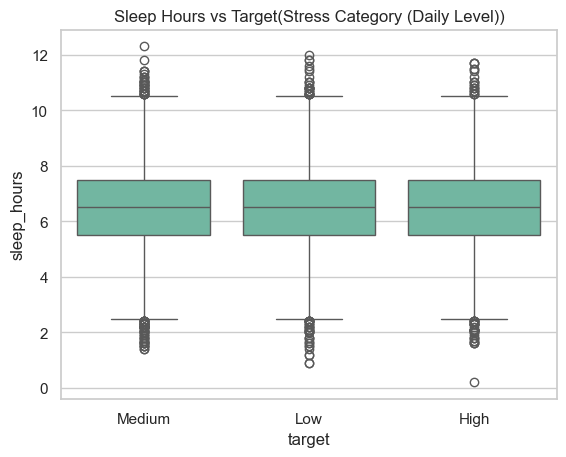

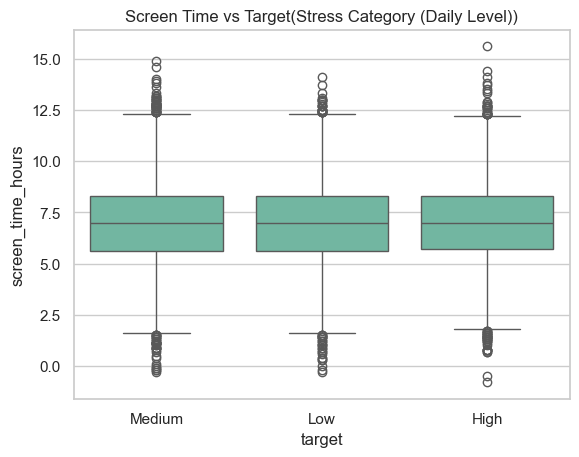

-----------------------------------------------------------------------------


/var/folders/h8/45lqwfxx7yjfd97nv0scjsb80000gn/T/ipykernel_1441/3550698597.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='mood', data=df, order=['Low', 'Medium', 'High'], palette='viridis')


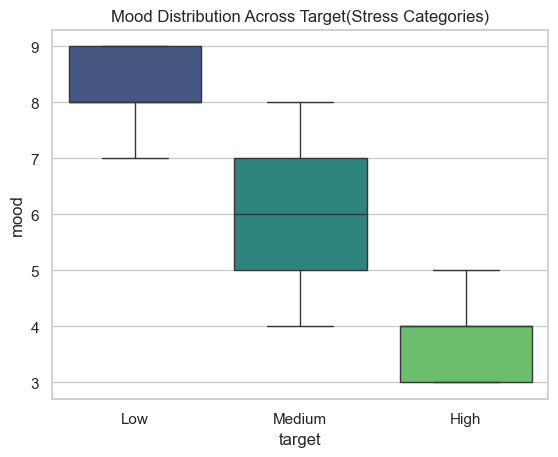

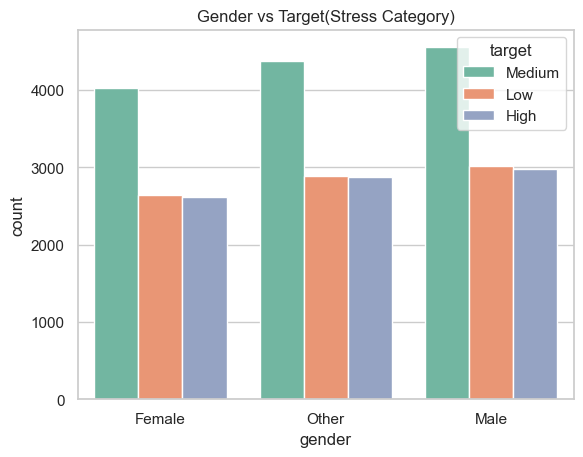

-----------------------------------------------------------------------------


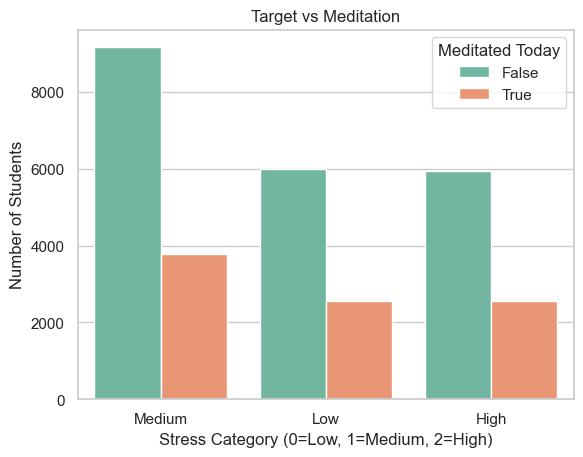

In [22]:
#===========================================
# 8. BIVARIATE ANALYSIS 
# ============================================
# 1. Sleep Hours vs Stress Category Boxplot
sns.boxplot(x='target', y='sleep_hours', data=df)
plt.title('Sleep Hours vs Target(Stress Category (Daily Level))')
plt.savefig("../reports/figures/2_Bivariate/1.sleepVsTarget.png")
plt.show()
# -------------------------------------------------------------
# 2. Screen Time vs Stress Category Boxplot
sns.boxplot(x='target', y='screen_time_hours', data=df)
plt.title('Screen Time vs Target(Stress Category (Daily Level))')
plt.savefig("../reports/figures/2_Bivariate/2.screen_timeVsTarget.png")
plt.show()
print("-----------------------------------------------------------------------------")
# 3. Mood vs Stress Category
sns.boxplot(x='target', y='mood', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Mood Distribution Across Target(Stress Categories)')
plt.savefig("../reports/figures/2_Bivariate/3.moodVsTarget.png")
plt.show()
# 4. Gender vs Stress Category
sns.countplot(x='gender', hue='target', data=df)
plt.title('Gender vs Target(Stress Category)')
plt.savefig("../reports/figures/2_Bivariate/4.genderVsTarget.png")
plt.show()
print("-----------------------------------------------------------------------------")
# 5. Target Vs Meditated today
sns.countplot( x='target',hue='meditated_today',data=df)
plt.title("Target vs Meditation")
plt.xlabel("Stress Category (0=Low, 1=Medium, 2=High)")
plt.ylabel("Number of Students")
plt.legend(title="Meditated Today")
plt.show()
# -------------------------------------------------------------
# ~ Key Insights for Bivariate Analysis ~:
# - Students with higher average sleep hours tend to report lower average stress levels.
# - Increased screen time is associated with higher average stress levels among students.
# - Mood distribution shows a clear inverse relationship where median mood scores drop significantly 
# as stress categories transition from Low to High
# -------------------------------------------------------------


2. Feature Vs Feature

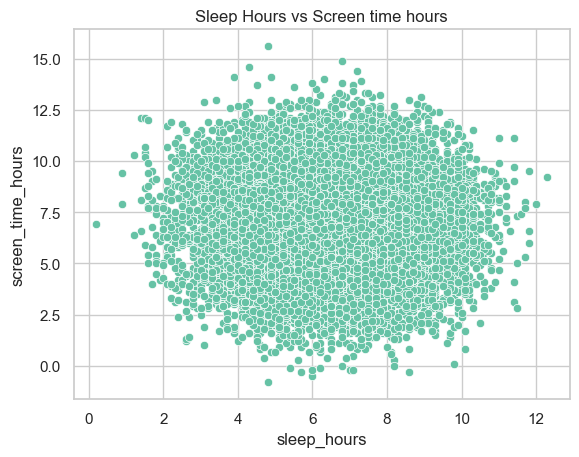

In [23]:
# 1. Sleep Hours vs Stress Level Scatterplot
sns.scatterplot(data=df,
                x='sleep_hours',
                y='screen_time_hours')
plt.title('Sleep Hours vs Screen time hours')
plt.savefig("../reports/figures/2_Bivariate/5.sleepVsScreen.png")
plt.show()

# -------------------------------------------------------------
# ~ Key Insights from Bivariate Analysis ~:
# Scatterplot shows a dense cloud distribution indicating that high screen time does 
# not automatically correlate with shorter sleep duration. There's no linear relationship.
# -------------------------------------------------------------

## Correlation Analysis

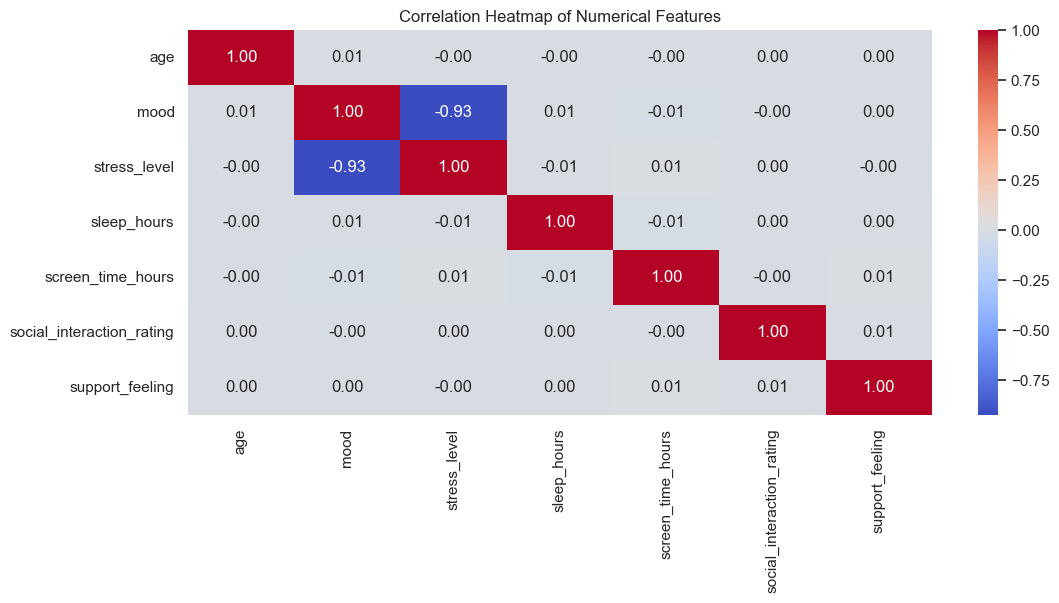

In [24]:
# ============================================================
# 9. CORRELATION ANALYSIS: Correlation heatmap for numerical features
# ============================================================
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 5))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig("../reports/figures/4_Correlation/Heatmap.png")
plt.show()
# ============================================================
# ~ Key Insights from Correlation Analysis ~:
# - The heatmap reveals a very strong negative correlation (-0.93) between Mood and Stress Level, 
# confirming that as a student's mood improves, their stress level significantly decreases.
# - Sleep Hours (-0.01) and Screen Time Hours (0.01) show near-zero correlation 
# with Stress Level in this specific dataset
# - Other features shows almost negligible linear relationship with stress with 0.00
# ============================================================